# QES Ocean Carbon Question Sheet



1. What are the three main processes that interact with ocean circulation to set the concentration and distribution of carbon in the ocean. Describe how DIC, TA and pCO2 change in response to these processes.

> Broadly, mixing processes in the ocean work to homogenise the ocean, while three chemical and biolgical 'Pumps' work to distribute carbon unevenly between the boxes. Those pumps are: 
> 1. The Solubility Pump, which describes the concentration of carbon in the deep ocean driven by the temperature dependence of gas solubility in the surface ocean, which is described by Henry's Law. More CO2 can dissolve into cold water than warm water, so cold, dense water sinking in downwelling regions has the highest CO2 concentration, which is transferred to the deep ocean. When this water eventually upwells and warms, it degases CO2 to the atmosphere. This explains first-order patterns of CO2 uptake and release in the ocean (uptake in regions with cooling water, release in upwelling regions with warming water). The solubility pump is 'amplified' by the speciation of DIC in seawater. CO2 reacts with water to form aqueous species HCO3- and CO32-, which do not exchange with the atmosphere. At normal surface water pH, only around 0.5% of the DIC pool exists as dissolved CO2, so the water holds around ~200 times more dissolved carbon that predicted by CO2 solubility alone. The action of the solubility pump causes CO2 to be elevated in the deep ocean, thus removing carbon from the atmosphere compared to a homogeneous well-mixed ocean.
> 2. The Biological Pump, which describes the uptake of carbon into organic matter by photosynthesis, which is then exported into the deep ocean. Biological productivity in the surface ocean is limited by the availability of light and nutrients. The primary limiting nutrients are the macronutrients N and P, although micronutrients like Fe and Zn can be important in some regions, particularly the southern ocean. The stoichiometry of organic matter is approximately 106C:16N:P, which means that for each mole of P exported from the surface ocean, 106 carbon travel with it. This creates a uni-directional flux of particulate carbon which leaves the surface ocean and is 'remineralised' back into deep water as it is broken down by bacteria. The biological pump acts to remove carbon from the atmosphere and concentrate it in the deep ocean.
> 3. The Carbonate Pump, which describes the formation and sinking of CaCO3 particles in the surface ocean. The production of calcium carbonate in the surface is biologcially mediated, primarily by coccolithophores, foraminifera and pteropods in the open ocean. Once the particles leave the surface ocean, changes in pressure destabilise the mineral, while reductions in [CO3] caused by a combination of pressure and organic matter remineralisation in the deep waters causes deep waters to become undersaturated with respect to CaCO3 (Ω < 1), causing the mineral to dissolve in the deep ocean. Calcification removes CO3 from the surface ocean, which causes DIC speciation to shift towards CO2, causing the release of CO2 to the atmosphere. Thus even though calcificatoin exports DIC from the surface, it also causes CO2 release to the atmosphere. This can also be considered in terms of the exporting DIC and TA in a 1:2 ratio. 

2. Describe the factors that limit biological productivity in the surface ocean, and cause the patterns in chlorophyll concentration that we see in the ocean.

Light and nutrients

3. Combine Henry's Law with the definition of DIC and the dissociation reactions given in Lecture 36 (Section 7.2 in the online notes) to derive an expression to calculate the concentration of DIC in seawater as a function of pCO2, [H+] and the equilibrium constants K_0, K_1 and K_2.

$$
\begin{align}
K_0 &= \frac{[CO_2^*]}{pCO_2} \\
K_1 &= \frac{[H+][HCO_3^{-}]}{[CO_2^*]} \\
K_2 &= \frac{[H+][CO_3^{2-}]}{[HCO_3^{-}]}
\end{align}
$$

$$
\begin{align}
DIC &= [CO_2^*] + [HCO_3^-] + [CO_3^{2-}] \\
&= [CO_2^*] + [HCO_3^-] + \frac{K_2 [HCO_3^-]}{[H^+]} & \mathrm{substitute ~ [CO_3^{2-}] ~ using ~ K_2} \\
&= [CO_2^*] + \frac{K_1[CO_2^*]}{[H^+]} + \frac{K_2 K_1 [CO_2^*]}{[H^+]^2} & \mathrm{substitute ~ [HCO_3^{-}] ~ using ~ K_1} \\
&= [CO_2^*] \left( 1 + \frac{K_1}{[H^+]} + \frac{K_2 K_1}{[H^+]^2} \right) & \mathrm{separate ~ [CO_2^*]} \\
DIC &= pCO_2~K_0 \left( 1 + \frac{K_1}{[H^+]} + \frac{K_2 K_1}{[H^+]^2} \right) & \mathrm{substitute ~ [CO_2^*] ~ using ~ K_0}
\end{align}
$$



4. Calculate the PgC of carbon in a homogeneous ocean and atmosphere using the expression you derived above. Use a pCO2 of 420 (present day) ppm and an ocean pH of 8.05, with equilibrium constants for 16 C and 35 Salinity: K0=0.0365, K1=1.175e-6, K2=7.720e-10. The mass of water in the ocean is 1.35 x10^21 kg, and there are around 1.736e20 moles of air in the atmosphere.

In [22]:
K0 = 0.0365
K1 = 1.175e-6
K2 = 7.720e-10

pCO2 = 420
pH = 8.05
H = 10**-pH

DIC = pCO2 * K0 * (1 + K1 / H + K1 * K2 / H**2)

ocean_PgC = 1e-6 * DIC * 1.4e21 * 12 / 1e15

atmos_PgC = 1e-6 * pCO2 * 1.736e20 * 12 / 1e15

print(atmos_PgC, ocean_PgC)

print('percent in ocean', atmos_PgC/(atmos_PgC + ocean_PgC) * 100)

874.944 37152.494106402744
percent in ocean 2.3008228888621454


5. Still in this homogeneous ocean, describe how increasing pCO2 would alter the partitioning of carbon between the ocean and atmosphere. Will the proportion of carbon stored in the ocean stay constant?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cbsyst as cb

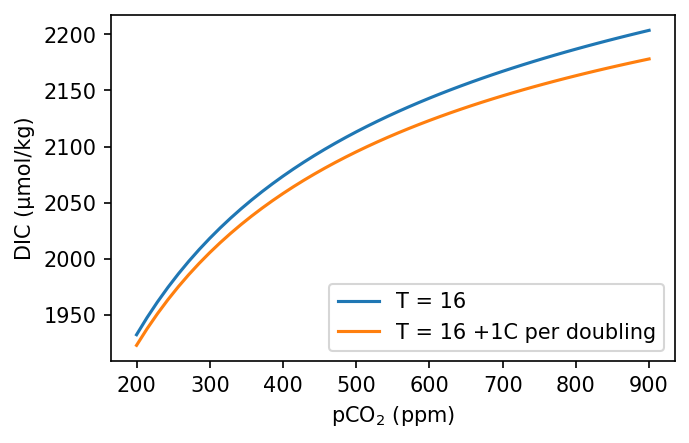

In [19]:
pCO2 = np.linspace(200, 900)

tc = cb.Csys(TA=2300, pCO2=pCO2, T_in=16)

T = 16 + 1 * pCO2 / 200

cc = cb.Csys(TA=2300, pCO2=pCO2, T_in=T)

fig, ax = plt.subplots(1, 1)

ax.plot(pCO2, tc.DIC, label='T = 16')
ax.plot(pCO2, cc.DIC, label='T = 16 +1C per doubling')

ax.set_xlabel('$pCO_2$ (ppm)')
ax.set_ylabel('DIC (μmol/kg)')

ax.legend()

6. Explain what is meant by the 'saturation state' of seawater with respect to calcium carbonate. Why does calcium carbonate dissolve in the deep ocean? 

7. Explain what is meant by 'ocean acidification'. What impact may ocean acidification have on the surface ocean?

8. Discuss the potential feedbacks between the carbonate pump and the biological pump, and how ocean acidification might alter them.